# Lecture 6
## Regression analysis

In [7]:
# %load '../../scripts/linear_regression.py'
import numpy as np

def linreg(X, Y):
    """
    Summary
        Linear regression of y = ax + b
    Usage
        real, real, real = linreg(list, list)
    Returns coefficients to the regression line "y=ax+b" from x[] and y[], and R^2 Value
    """
    N = len(X)

    if N != len(Y):  raise(ValueError, 'unequal length')

    Sx = Sy = Sxx = Syy = Sxy = 0.0
    for x, y in zip(X, Y):
        Sx = Sx + x
        Sy = Sy + y
        Sxx = Sxx + x*x
        Syy = Syy + y*y
        Sxy = Sxy + x*y

    det =  Sx * Sx - Sxx * N # see the lecture

    a,b = (Sy * Sx - Sxy * N)/det, (Sx * Sxy - Sxx * Sy)/det

    meanerror = residual = residualx = 0.0

    for x, y in zip(X, Y):
        meanerror = meanerror + (y - Sy/N)**2
        residual = residual + (y - a * x - b)**2
        residualx = residualx + (x - Sx/N)**2

    RR = 1 - residual/meanerror
    # linear regression, a_0, a_1 => m = 1
    m = 1
    nu = N - (m+1)

    sxy = np.sqrt(residual / nu)

    # Var_a, Var_b = ss * N / det, ss * Sxx / det

    Sa = sxy * np.sqrt(1/residualx)
    Sb = sxy * np.sqrt(Sxx/(N*residualx))


    # We work with t-distribution, ()
    # t_{nu;\alpha/2} = t_{3,95} = 3.18

    print("Estimate: y = ax + b")
    print("N = %d" % N)
    print("Degrees of freedom $\\nu$ = %d " % nu)
    print("a = %.2f $\\pm$ %.3f" % (a, 3.18*Sa/np.sqrt(N)))
    print("b = %.2f $\\pm$ %.3f" % (b, 3.18*Sb/np.sqrt(N)))
    print("R^2 = %.3f" % RR)
    print("Sxy = %.3f" % sxy)
    print("y = %.2f x + %.2f $\\pm$ %.2fV" % (a, b, 3.18*sxy/np.sqrt(N)))
    return a, b, RR, sxy

### Linear potentiometer calibration: distance versus voltage

In [8]:
X = np.array([1.0, 2.0, 3.0, 4.0, 5.0]) # (cm)
Y = np.array([1.2, 1.9, 3.2, 4.1, 5.3]) # (Volt)

In [9]:
a,b,RR,sxy = linreg(X,Y)

Estimate: y = ax + b
N = 5
Degrees of freedom $\nu$ = 3 
a = 1.04 $\pm$ 0.072
b = 0.02 $\pm$ 0.237
R^2 = 0.993
Sxy = 0.159
y = 1.04 x + 0.02 $\pm$ 0.23V


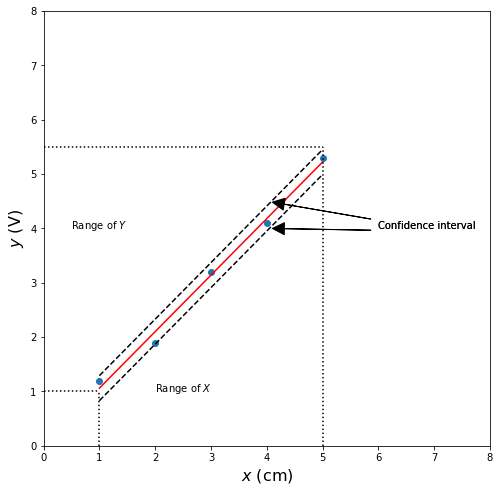

In [45]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(8,8))
ax.plot(X,Y,'o')
ax.plot(X,(X*a + b),'r-')
ax.plot(X,(X*a + b +.23),'k--')
ax.plot(X,(X*a + b - .23),'k--')
ax.set_xlim((0,8))
ax.set_ylim((0,8))
ax.text(.5,4,'Range of $Y$')
ax.text(2,1,'Range of $X$')
ax.plot([0,1],[1,1],'k:')
ax.plot([0,5],[5.5,5.5],'k:')
ax.plot([1,1],[0,1],'k:')
ax.plot([5,5],[0,5.5],'k:')

ax.annotate('Confidence interval', xy=(4,4), xytext=(6,4),
            arrowprops=dict(facecolor='black', shrink=0.05,width=.1),
            )
ax.annotate('Confidence interval', xy=(4,4.5), xytext=(6,4),
            arrowprops=dict(facecolor='black', shrink=0.05,width=.1),
            )

ax.set_xlabel('$x$ (cm)',fontsize=16)
ax.set_ylabel('$y$ (V)',fontsize=16);